In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import unidecode

**Cargar datos**

In [2]:
df = pd.read_csv('ventas.csv')
df

,cliente,cantidad,precio,total_venta
0,Juan Perez,5.0,100.00,500.00
1,JUAN PÉREZ,5.0,100.00,500.00
2,juan p.,5.0,100.00,500.00
3,Maria Gómez,2.0,500.00,1000.00
4,María Gómez,2.0,500.00,1000.00
5,Carlos Lòpez,10000.0,100.00,1000000.00
6,Pedro,NaN,150.00,NaN
7,Ana Torres,3.0,0.01,0.03
8,anA torres,3.0,1000.00,3000.00
9,Laura,2.0,NaN,200.00


**Información de los datos**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cliente      13 non-null     object 
 1   cantidad     12 non-null     float64
 2   precio       12 non-null     float64
 3   total_venta  12 non-null     float64
dtypes: float64(3), object(1)
memory usage: 548.0+ bytes


**Filas y columnas del DatFrame**

In [4]:
filas, columnas = df.shape
print(f'Cantidad de Filas: {filas}\nCantidad de Columnas: {columnas}')

Cantidad de Filas: 13
Cantidad de Columnas: 4


**Verificar valores nulos en los datos**

In [5]:
canti_nulos = df.isnull().sum()
print(f'Cantidad de valore nulos\n{canti_nulos}')

Cantidad de valore nulos
cliente        0
cantidad       1
precio         1
total_venta    1
dtype: int64


**Identidificar las filas con los valores nulos**

In [6]:
filas_con_nulos = df[df.isnull().any(axis=1)]
filas_con_nulos

,cliente,cantidad,precio,total_venta
6,Pedro,NaN,150.0,NaN
9,Laura,2.0,NaN,200.0


**Corregir datos con valores nulos(es posible llenarlo los datos ya que tiene la información necesaria)**

In [19]:
df.loc[9,'precio'] = 100
print('Verificamos')
df.loc[9]


Verificamos


cliente        Laura
cantidad         2.0
precio         100.0
total_venta    200.0
Name: 9, dtype: object

**Eliminar fila con valores nulos(no es posible llenarlos con datos que sean correctos)**

In [24]:
df = df.dropna()

**Verificamos que los valores nulos fueron tratados**

In [25]:

print(f'Cantidad de valores nulos\n{df.isnull().sum()}')
print(f'\nFilas con valores nulos\n{df[df.isnull().any(axis=1)]}')

Cantidad de valores nulos
cliente        0
cantidad       0
precio         0
total_venta    0
dtype: int64

Filas con valores nulos
Empty DataFrame
Columns: [cliente, cantidad, precio, total_venta]
Index: []


**Verificar valores duplicados por filas(registro)**

In [75]:
cant_duplicados = df.duplicated().sum()
print(f'Cantidad de valores duplicados\n{cant_duplicados}')

Cantidad de valores duplicados
1


**Identificar que filas son las duplicadas**

In [79]:
filas_duplicadas = df[df.duplicated(keep=False)]
filas_duplicadas

,cliente,cantidad,precio,total_venta
10,Jose,2.0,120.0,240.0
11,Jose,2.0,120.0,240.0


**Eliminar filas duplicadas**

In [26]:
df = df.drop_duplicates()

# Verificar los valores duplicados
print(f'Cantidad de valores duplicados\n{df.duplicated().sum()}')

Cantidad de valores duplicados
0


**Errores de entrada**

**1. Valores únicos sospechosos**

In [27]:
nombre_cliente = df['cliente'].value_counts()
nombre_cliente

cliente
Juan Perez      1
JUAN PÉREZ      1
juan p.         1
Maria Gómez     1
María Gómez     1
Carlos Lòpez    1
Ana Torres      1
anA torres      1
Laura           1
Jose            1
Jòsé            1
Name: count, dtype: int64

**2. Normalización básica del texto**

In [28]:
df['nombre_normalizado'] = df['cliente'].str.lower()  # o .str.upper()
df['nombre_normalizado'] = df['nombre_normalizado'].apply(unidecode.unidecode)
df['nombre_normalizado'] = df['nombre_normalizado'].str.strip()

**3. Agrupación por similitud de texto (fuzzy matching)**

In [29]:
nombre_normalizados = df['nombre_normalizado'].value_counts()
nombre_normalizados

nombre_normalizado
juan perez      2
maria gomez     2
ana torres      2
jose            2
juan p.         1
carlos lopez    1
laura           1
Name: count, dtype: int64

**4. Visualización de frecuencias**

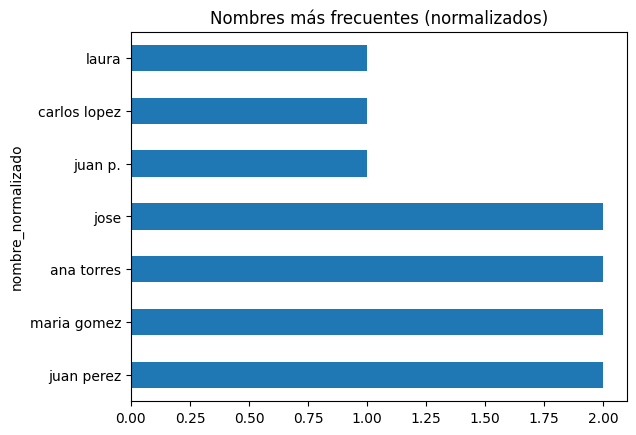

In [30]:
df['nombre_normalizado'].value_counts().head(10).plot(kind='barh')
plt.title("Nombres más frecuentes (normalizados)")
plt.show()

**5.-Correcciones**

In [31]:
correcciones = {
    'laura': 'Laura',
    'juan p.':'Juan Pérez',
    'carlos lopez':'Carlos López',
    'maria gomez':'María Gómez',
    'ana torres':'Ana Torres',
    'juan perez':'Juan Pérez',
    'jose':'José'
}

df['cliente'] = df['nombre_normalizado'].replace(correcciones)
df = df.drop(columns=['nombre_normalizado'])
df

,cliente,cantidad,precio,total_venta
0,Juan Pérez,5.0,100.00,500.00
1,Juan Pérez,5.0,100.00,500.00
2,Juan Pérez,5.0,100.00,500.00
3,María Gómez,2.0,500.00,1000.00
4,María Gómez,2.0,500.00,1000.00
5,Carlos López,10000.0,100.00,1000000.00
7,Ana Torres,3.0,0.01,0.03
8,Ana Torres,3.0,1000.00,3000.00
9,Laura,2.0,100.00,200.00
10,José,2.0,120.00,240.00


**Errores numéricos**

In [33]:
maximo_cantidad = df['cantidad'].max()
minimo_cantidad = df['cantidad'].min()

print(f'Cantidad\nValor Maximo: {maximo_cantidad}\nValor Mínimo: {minimo_cantidad}')

Cantidad
Valor Maximo: 10000.0
Valor Mínimo: 2.0
